In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

class Logistic_Regression():
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.w = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, w, X, y):
        l = X.shape[1]
        z = w.T @ X
        a = self.sigmoid(z)
        
        loss = -np.sum(y * np.log(a) + (1 - y) * np.log(1 - a)) / l
        grad = (X @ (a - y).T) / l
        return loss, grad

    def add_bias(self, X):
        bias_row = np.ones((1, X.shape[1]))
        return np.vstack([bias_row, X])

    def optimize(self, X, y):
        X_with_bias = self.add_bias(X)
        self.w = np.zeros((X_with_bias.shape[0], 1))
        
        losses = []
        
        for i in range(self.max_iterations):
            loss, grad = self.log_loss(self.w, X_with_bias, y)
            self.w -= self.learning_rate * grad
            losses.append(loss)

        return self.w, losses

    def predict(self, X, threshold=0.5):
        X_with_bias = self.add_bias(X)
        y_pred = self.sigmoid(self.w.T @ X_with_bias)
        return (y_pred >= threshold).astype(int)


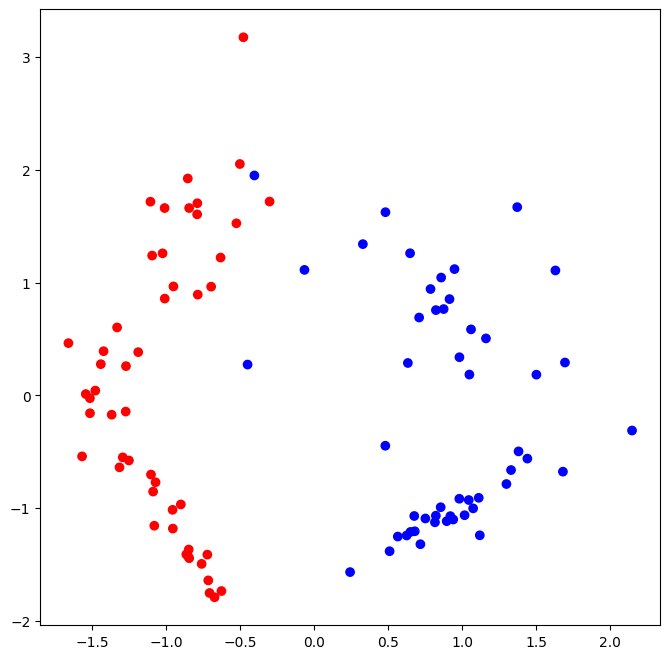

In [2]:
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

plt.show()

In [3]:
# перемешивание датасета
np.random.seed(12) # это число позволяет постоянно получать одну и ту же "случайность"
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [4]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [5]:
n_iterations = 1000
eta = 0.05

model = Logistic_Regression(eta, n_iterations)

w, losses = model.optimize( X_train_tr, y_train_tr)

y_predicted_test = model.predict(X_test_tr)
y_predicted_train = model.predict(X_train_tr)

# В качестве меры точности возьмём долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[0.38802205]
 [3.76368713]
 [0.22385252]]
Точность на обучающей выборке: 98.571
Точность на тестовой выборке: 96.667


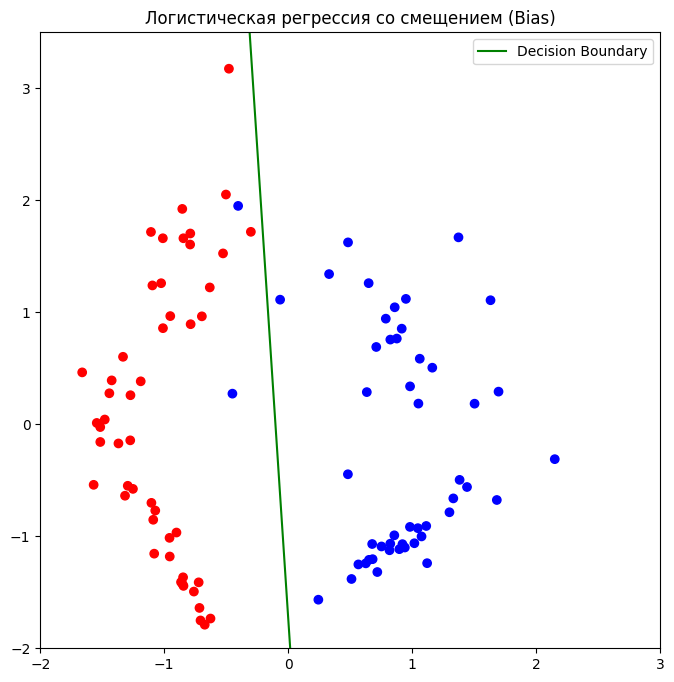

In [6]:
plt.figure(figsize=(8, 8))
colors = ListedColormap(['red', 'blue'])

# Рисуем точки
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

# Рисуем границу разделения
x_values = np.linspace(-2, 2, 100)

# w[0] - это bias
# w[1] - вес при x (признак 0)
# w[2] - вес при y (признак 1)
y_values = - (w[1] * x_values + w[0]) / w[2]

plt.plot(x_values, y_values, color='green', label='Decision Boundary')
plt.legend()
plt.ylim(-2, 3.5)
plt.xlim(-2, 3)
plt.title("Логистическая регрессия со смещением (Bias)")
plt.show()

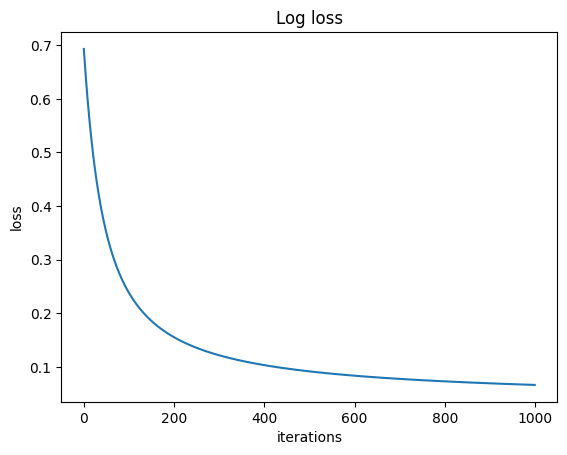

In [7]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)

plt.show()

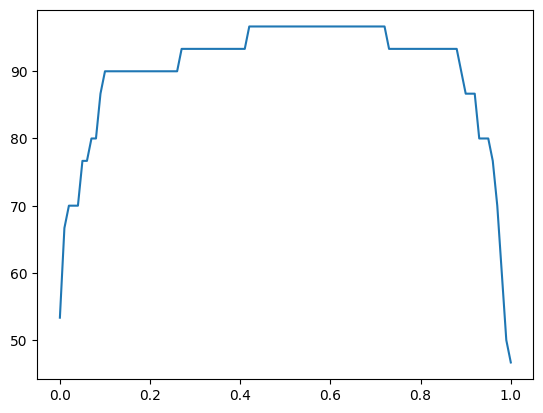

In [8]:
test_acc = []
b_l = []

for b in range(0, 101):
  y_predicted_test = model.predict(X_test_tr, b/100)
  y_predicted_train = model.predict(X_train_tr, b/100)

  # В качестве меры точности возьмём долю правильных ответов

  test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test)*100.0)

  b_l.append(b/100)
  test_acc.append(test_accuracy)

plt.plot(b_l, test_acc)
plt.show()